<a href="https://colab.research.google.com/github/bran1233/curso-machine-learning/blob/main/Python/Linear_regression/Lab_Boston_Housing_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<img src="https://storage.googleapis.com/kaggle-datasets-images/1379/2485/a52db2794593657403a4235bfc4147aa/dataset-cover.jpg
" width="1000" height="300" >


<h1 align=center><font size = 5>Boston Housing</font></h1>

---

## Introducción


En este laboratorio, aprenderá a usar python para construir un modelo de regresión.


<h3>Objetivo de este Notebook<h3>    
<h5> 1. Como construir e interpretar un modelo de regresión.</h5>
<h5> 2. Descargar y limpiar un Dataset </h5>
<h5> 3. Realizar los pasos necesarios previos a la etapa de modelamiento </h5>
<h5> 4. Entrenar y Testear modelo </h5>     

### Tabla de Contenidos

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
    
1. <a href="#item31">Leer y explorar la data</a>  
2. <a href="#item32">Selección de muestras</a>  
3. <a href="#item33">Pre-selección de variables</a>
4. <a href="#item33">Preparación de datos</a>
5. <a href="#item33">Construir un modelo de regresión lineal</a>  
6. <a href="#item34">Testear el modelo</a>  

</font>
</div>

## Importar Librerías


Primero, importemos algunos módulos comunes.

In [1]:
# Imports comunes
import pandas as pd
import numpy as np

# Configuración de tamaño de gráficos matplotlib
import matplotlib.pyplot as plt

# Cargar seaborn
import seaborn as sns

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# os proporciona funciones para interactuar con el sistema operativo y realizar operaciones relacionadas con archivos y directorios.
import os


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Problema Bostong Housing

<b>Valores de la vivienda en los suburbios de Boston</b>

<h5>La variable <b>medv</b> es la variable objetivo.</h5>

<b>Descripción de datos</b>

El data frame de Boston tiene 506 filas y 14 columnas.



<b>Este data frame contiene las siguientes columnas:</b>

---

* <b>crim : </b> Tasa de criminalidad per cápita por ciudad.

* <b>zn : </b> Proporción de terreno residencial dividido en zonas para lotes de más de 25,000 pies cuadrados.

* <b>indus : </b> Proporción de acres comerciales no minoristas por ciudad.

* <b>chas : </b> Variable ficticia de Charles River (= 1 si el tramo limita con el río; 0 en caso contrario).

* <b>nox : </b>Concentración de óxidos de nitrógeno (partes por 10 millones).

* <b>rm : </b>Número medio de habitaciones por vivienda.

* <b>años : </b> Proporción de unidades ocupadas por sus propietarios construidas antes de 1940.

* <b>dis : </b>Media ponderada de las distancias a cinco centros de empleo de Boston.

* <b>rad : </b>Indice de accesibilidad a carreteras radiales.

* <b>impuesto : </b>Tasa de impuesto a la propiedad de valor total por \$ 10,000.

* <b>ptratio : </b>Proporción alumno-profesor por ciudad.

* <b>black : </b> 1000 (Bk - 0.63) ^ 2 donde Bk es la proporción de negros por ciudad.

* <b>lstat : </b>Estatus más bajo de la población (porcentaje).

* <b>medv : </b>Valor medio de las viviendas ocupadas por sus propietarios en \$ 1000.

---



<strong>Puede consultar este [link](https://kaggle.com/c/boston-housing) para leer más sobre la fuente de datos boston housing.</strong>

<strong>Puede descargar la data en este [link](https://www.kaggle.com/datasets/altavish/boston-housing-dataset)</strong>


## 1. Leyendo y Explorando data

Creando carpeta para archivos del proyecto

In [3]:
# Creando carpetas
nombre_carpeta = 'linear_regression'
os.makedirs(nombre_carpeta)
os.makedirs(nombre_carpeta + '/data')
os.makedirs(nombre_carpeta + '/plots')
os.makedirs(nombre_carpeta + '/results')

Lectura de datos

In [4]:
#cargamos la data
pddf = pd.read_csv('linear_regression/data/HousingData 2.csv')

In [ ]:
#cargamos la data
pddf = pd.read_csv('/content/drive/MyDrive/ARCHIVOS ESPECIALIZACION MACHINE LEARNING/Housing Data 2.csv')

In [5]:
# Validar la data de forma general
pddf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [6]:
# Contar los datos
pddf.shape

(506, 14)

Identificar los principales atributos

In [7]:
# Variable objetivo
target = 'MEDV'

In [8]:
# Identificar las variables numéricas utilizando el atributo dtypes
variables_numericas = pddf.select_dtypes(include=['number']).columns.tolist()
variables_numericas.remove(target)

In [9]:
# Identificar las variables categóricas utilizando el atributo dtypes
variables_categoricas = pddf.select_dtypes(include=['object']).columns.tolist()
variables_categoricas

[]

In [10]:
# Guardando variables en una tabla
dataResume = pd.DataFrame({'feature' : variables_numericas, 'type' : 'numeric'})
dataResume = dataResume.append(pd.DataFrame({'feature' : [target], 'type' : 'target'}))
dataResume.to_csv('linear_regression/results/dataResume.csv', index = 0)

<ipython-input-10-24c90fc23702>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataResume = dataResume.append(pd.DataFrame({'feature' : [target], 'type' : 'target'}))


Exploración de los datos

<Figure size 400x600 with 0 Axes>

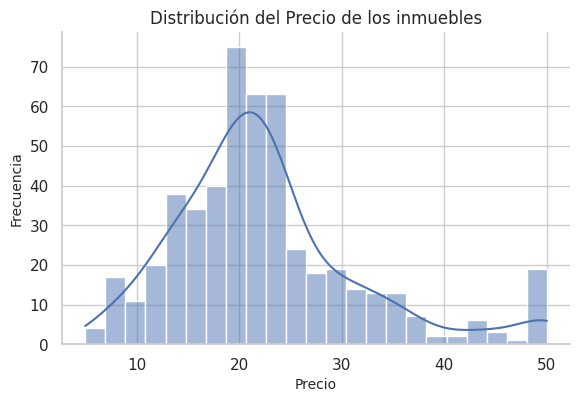

In [11]:
plt.figure(figsize=(4, 6))  # Tamaño del gráfico (ancho x alto en pulgadas)

# Gráfico de distribución
sns.displot(pddf['MEDV'], height=4, aspect=1.5, kde=True)
plt.title("Distribución del Precio de los inmuebles", fontsize=12)  # Título del gráfico
plt.xlabel("Precio", fontsize=10)  # Nombre del eje x
plt.ylabel("Frecuencia", fontsize=10)  # Nombre del eje y

plt.savefig("dist_MEDV.png")  # Guarda el gráfico como un archivo PNG
plt.show()

Graficamos todas las variables

In [12]:
plt.figure(figsize=(4, 6))  # Tamaño del gráfico (ancho x alto en pulgadas)

for col in variables_numericas:
  # Gráfico de distribución
  sns.displot(pddf[col], height=4, aspect=1.5, kde=True)
  plt.title("Distribución de " + col, fontsize=12)  # Título del gráfico
  plt.xlabel(col, fontsize=10)  # Nombre del eje x
  plt.ylabel("Frecuencia", fontsize=10)  # Nombre del eje y
  plt.savefig("linear_regression/plots/dist_" + col + ".png")  # Guarda el gráfico como un archivo PNG
  plt.close()

<Figure size 400x600 with 0 Axes>

## 2. Selección de muestras

El conjunto de datos en machine learning se divide típicamente en dos partes: el conjunto de entrenamiento (train) y el conjunto de prueba (test). Estas divisiones se utilizan para entrenar y evaluar los modelos.

**Train**: El conjunto de entrenamiento se utiliza para entrenar el modelo de aprendizaje automático. Es aquí donde el modelo "aprende" los patrones y relaciones en los datos para poder hacer predicciones o clasificaciones.

**Test**: El conjunto de prueba se utiliza para evaluar el rendimiento del modelo en datos no vistos durante el entrenamiento. Es una medida objetiva de la capacidad del modelo para generalizar y realizar predicciones precisas en nuevos datos.

In [13]:
# Muestreo
#La función train_test_split de scikit-learn se utiliza para dividir un conjunto de datos en subconjuntos de train y test.
from sklearn.model_selection import train_test_split

train, test = train_test_split(pddf, # Base de datos
                               train_size = 0.7, # Especificar el tamaño de train/test
                               random_state = 123) # Semilla aleatoria


In [14]:
print(f"Tamaño del total de datos: {len(pddf)}")
print(f"Tamaño de train: {len(train)}")
print(f"Tamaño de test: {len(test)}")

Tamaño del total de datos: 506
Tamaño de train: 354
Tamaño de test: 152


Análisis exploratorio de relación de datos

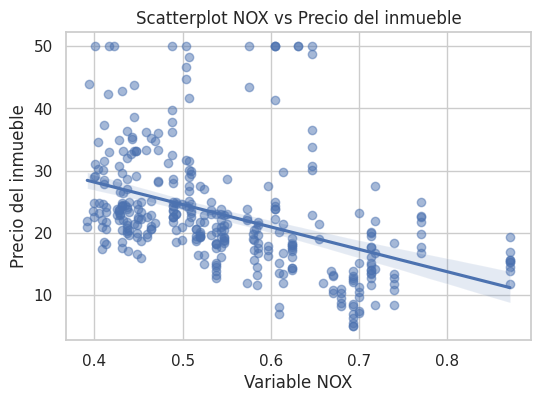

In [15]:
# Crear scatterplot
plt.figure(figsize=(6, 4))
sns.regplot(x = train.NOX, y = train.MEDV, scatter_kws={"alpha": 0.5})

# Personalizar el título y los nombres de los ejes
plt.title(f"Scatterplot NOX vs Precio del inmueble")
plt.xlabel("Variable NOX")
plt.ylabel("Precio del inmueble")

# Mostrar el gráfico
plt.show()

In [16]:
plt.figure(figsize=(4, 6))  # Tamaño del gráfico (ancho x alto en pulgadas)

for col in variables_numericas:
  # Gráfico de distribución
  sns.regplot(x = train[col], y = train[target], scatter_kws={"alpha": 0.5})

  # Personalizar el título y los nombres de los ejes
  plt.title(f"Scatterplot {col} vs Precio del inmueble")
  plt.xlabel(f"Variable {col}")
  plt.ylabel("Precio del inmueble")

  plt.savefig("linear_regression/plots/scatter_" + col + ".png")  # Guarda el gráfico como un archivo PNG
  plt.close()

In [17]:
train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
273,0.22188,20.0,6.96,1.0,0.464,7.691,51.8,4.3665,3,223,18.6,390.77,6.58,35.2
52,0.05360,21.0,5.64,0.0,0.439,6.511,21.1,6.8147,4,243,16.8,396.90,5.28,25.0
181,0.06888,0.0,2.46,0.0,0.488,6.144,62.2,2.5979,3,193,17.8,396.90,9.45,36.2
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24,666,20.2,385.09,17.27,16.1
381,15.87440,0.0,18.10,0.0,0.671,6.545,99.1,1.5192,24,666,20.2,396.90,21.08,10.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.08187,0.0,2.89,0.0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8
476,4.87141,0.0,18.10,0.0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7
322,0.35114,0.0,7.38,0.0,0.493,6.041,49.9,4.7211,5,287,19.6,396.90,7.70,20.4
382,9.18702,0.0,18.10,0.0,0.700,5.536,100.0,1.5804,24,666,20.2,396.90,23.60,11.3


## 3. Pre-selección de variables

In [20]:
# Dando formato a nuestra tabla resumen

pdResume = train.describe().transpose()
pdResume.reset_index(inplace = True)
pdResume.rename(columns = {'index' : 'feature',
                           '25%' : 'Q1',
                           '50%' : 'median',
                           '75%' : 'Q3'}, inplace = True)
pdResume

,feature,count,mean,std,min,Q1,median,Q3,max
0,CRIM,343.0,3.493096,9.295925,0.01301,0.07937,0.22212,2.414435,88.9762
1,ZN,338.0,11.186391,22.991758,0.00000,0.00000,0.00000,12.500000,100.0000
2,INDUS,337.0,10.831128,6.802785,0.46000,5.19000,8.56000,18.100000,27.7400
3,CHAS,340.0,0.058824,0.235641,0.00000,0.00000,0.00000,0.000000,1.0000
4,NOX,354.0,0.550042,0.113865,0.39200,0.44825,0.52400,0.624000,0.8710
5,RM,354.0,6.314153,0.708672,3.56100,5.92650,6.21400,6.634000,8.7250
6,AGE,338.0,67.640828,28.155932,6.20000,42.57500,76.25000,92.900000,100.0000
7,DIS,354.0,3.853660,2.127925,1.16910,2.11370,3.29480,5.226975,12.1265
8,RAD,354.0,9.214689,8.451106,1.00000,4.00000,5.00000,8.000000,24.0000
9,TAX,354.0,401.550847,166.332065,187.00000,277.00000,329.00000,666.000000,711.0000


In [21]:
pdResume[['missing_rate']] = 1 - pdResume[['count']]/train.shape[0]
pdResume.sort_values(by = 'missing_rate', ascending = False, inplace = True)


In [22]:
pdResume

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate
2,INDUS,337.0,10.831128,6.802785,0.46000,5.19000,8.56000,18.100000,27.7400,0.048023
1,ZN,338.0,11.186391,22.991758,0.00000,0.00000,0.00000,12.500000,100.0000,0.045198
6,AGE,338.0,67.640828,28.155932,6.20000,42.57500,76.25000,92.900000,100.0000,0.045198
3,CHAS,340.0,0.058824,0.235641,0.00000,0.00000,0.00000,0.000000,1.0000,0.039548
12,LSTAT,341.0,12.753138,7.274235,1.73000,6.93000,11.10000,17.160000,36.9800,0.036723
0,CRIM,343.0,3.493096,9.295925,0.01301,0.07937,0.22212,2.414435,88.9762,0.031073
4,NOX,354.0,0.550042,0.113865,0.39200,0.44825,0.52400,0.624000,0.8710,0.000000
5,RM,354.0,6.314153,0.708672,3.56100,5.92650,6.21400,6.634000,8.7250,0.000000
7,DIS,354.0,3.853660,2.127925,1.16910,2.11370,3.29480,5.226975,12.1265,0.000000
8,RAD,354.0,9.214689,8.451106,1.00000,4.00000,5.00000,8.000000,24.0000,0.000000


In [23]:
# Calculando las correlaciones de todas las variables con el target
correlations = train.corr()[['MEDV']]
correlations.reset_index(inplace = True)
correlations.rename(columns = {'index' : 'feature',
                               'MEDV' : 'corr'}, inplace = True)
correlations

,feature,corr
0,CRIM,-0.390118
1,ZN,0.373650
2,INDUS,-0.507507
3,CHAS,0.108482
4,NOX,-0.442008
5,RM,0.744229
6,AGE,-0.407618
7,DIS,0.256067
8,RAD,-0.402371
9,TAX,-0.505460


In [24]:
# Cruzando correlaciones con la tabla de resumen original
univariate = pd.merge(pdResume, correlations, on = 'feature')
univariate.head()

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate,corr
0,INDUS,337.0,10.831128,6.802785,0.46,5.190,8.56,18.10,27.74,0.048023,-0.507507
1,ZN,338.0,11.186391,22.991758,0.00,0.000,0.00,12.50,100.00,0.045198,0.373650
2,AGE,338.0,67.640828,28.155932,6.20,42.575,76.25,92.90,100.00,0.045198,-0.407618
3,CHAS,340.0,0.058824,0.235641,0.00,0.000,0.00,0.00,1.00,0.039548,0.108482
4,LSTAT,341.0,12.753138,7.274235,1.73,6.930,11.10,17.16,36.98,0.036723,-0.744705


In [26]:
# Creamos la columna correlacion absoluta
univariate['abs_corr'] = univariate['corr'].apply(lambda x: abs(x))
univariate.sort_values(by = 'abs_corr', ascending = False, inplace=True)
univariate.head(15)

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate,corr,abs_corr
13,MEDV,354.0,22.761864,9.275237,5.00000,17.32500,21.55000,25.000000,50.0000,0.000000,1.000000,1.000000
4,LSTAT,341.0,12.753138,7.274235,1.73000,6.93000,11.10000,17.160000,36.9800,0.036723,-0.744705,0.744705
7,RM,354.0,6.314153,0.708672,3.56100,5.92650,6.21400,6.634000,8.7250,0.000000,0.744229,0.744229
11,PTRATIO,354.0,18.441525,2.133292,12.60000,17.40000,18.95000,20.200000,22.0000,0.000000,-0.527838,0.527838
0,INDUS,337.0,10.831128,6.802785,0.46000,5.19000,8.56000,18.100000,27.7400,0.048023,-0.507507,0.507507
10,TAX,354.0,401.550847,166.332065,187.00000,277.00000,329.00000,666.000000,711.0000,0.000000,-0.505460,0.505460
6,NOX,354.0,0.550042,0.113865,0.39200,0.44825,0.52400,0.624000,0.8710,0.000000,-0.442008,0.442008
2,AGE,338.0,67.640828,28.155932,6.20000,42.57500,76.25000,92.900000,100.0000,0.045198,-0.407618,0.407618
9,RAD,354.0,9.214689,8.451106,1.00000,4.00000,5.00000,8.000000,24.0000,0.000000,-0.402371,0.402371
5,CRIM,343.0,3.493096,9.295925,0.01301,0.07937,0.22212,2.414435,88.9762,0.031073,-0.390118,0.390118


In [27]:
# Guardando resultados
univariate.to_csv('linear_regression/results/univariate_assesment.csv', index = 0)

Puedes hacer pre-selección de variables quedándote con las variables conmás correlación con el target y con menos missing rate

In [28]:
preselection = univariate.loc[(univariate.abs_corr >= 0.2) & (univariate.missing_rate <= 0.8)]
print(f"{len(preselection)} variables de {len(univariate)} pasan el proceso de pre-selección")

13 variables de 14 pasan el proceso de pre-selección


In [29]:
preselection

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate,corr,abs_corr
13,MEDV,354.0,22.761864,9.275237,5.00000,17.32500,21.55000,25.000000,50.0000,0.000000,1.000000,1.000000
4,LSTAT,341.0,12.753138,7.274235,1.73000,6.93000,11.10000,17.160000,36.9800,0.036723,-0.744705,0.744705
7,RM,354.0,6.314153,0.708672,3.56100,5.92650,6.21400,6.634000,8.7250,0.000000,0.744229,0.744229
11,PTRATIO,354.0,18.441525,2.133292,12.60000,17.40000,18.95000,20.200000,22.0000,0.000000,-0.527838,0.527838
0,INDUS,337.0,10.831128,6.802785,0.46000,5.19000,8.56000,18.100000,27.7400,0.048023,-0.507507,0.507507
10,TAX,354.0,401.550847,166.332065,187.00000,277.00000,329.00000,666.000000,711.0000,0.000000,-0.505460,0.505460
6,NOX,354.0,0.550042,0.113865,0.39200,0.44825,0.52400,0.624000,0.8710,0.000000,-0.442008,0.442008
2,AGE,338.0,67.640828,28.155932,6.20000,42.57500,76.25000,92.900000,100.0000,0.045198,-0.407618,0.407618
9,RAD,354.0,9.214689,8.451106,1.00000,4.00000,5.00000,8.000000,24.0000,0.000000,-0.402371,0.402371
5,CRIM,343.0,3.493096,9.295925,0.01301,0.07937,0.22212,2.414435,88.9762,0.031073,-0.390118,0.390118


En una regresión lineal, uno de los supuestos clave es la asunción de correlación entre la variable independiente (predictora) y la variable dependiente. La correlación implica una relación lineal entre las dos variables, lo que significa que a medida que una variable aumenta, la otra también tiende a aumentar (correlación positiva) o disminuir (correlación negativa).



La correlación entre las variables se puede evaluar utilizando medidas como el coeficiente de correlación de Pearson. El coeficiente de correlación de Pearson varía entre -1 y 1, donde un valor de 1 indica una correlación positiva perfecta, -1 indica una correlación negativa perfecta y 0 indica una falta de correlación lineal.



En el contexto de una regresión lineal, el supuesto de correlación se refiere a la expectativa de que exista una relación lineal entre la variable independiente y la variable dependiente. Si no hay correlación o la correlación es débil, el modelo de regresión lineal puede no ser apropiado para capturar y predecir la relación entre las variables.



Es importante considerar la correlación al realizar un análisis de regresión lineal, ya que una correlación inadecuada puede conducir a estimaciones sesgadas o no confiables de los coeficientes de regresión. Si no se cumple el supuesto de correlación, puede ser necesario considerar otros modelos de regresión o técnicas de análisis más apropiadas para el conjunto de datos en cuestión.

## 4. Preparación de datos

### 4.1. Tratamiento de outliers

El tratamiento de outliers, también conocido como manejo de valores atípicos, es un proceso en el análisis de datos que se refiere a cómo se deben abordar los puntos de datos que se encuentran fuera del rango típico o esperado. Los outliers son observaciones que se desvían significativamente del patrón general de los demás datos.

#### Rango Intercuantílico

El tratamiento de outliers utilizando el rango intercuartílico (IQR, por sus siglas en inglés) es una técnica común para identificar y manejar valores atípicos en un conjunto de datos. El rango intercuartílico es la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1) de los datos.

<img src="https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png" width="500"
     height="300" >

In [30]:
#Leyendo tabla resumen
univariate_II = pd.read_csv('linear_regression/results/univariate_assesment.csv')
univariate_II.head()

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate,corr,abs_corr
0,MEDV,354.0,22.761864,9.275237,5.000,17.3250,21.550,25.000,50.000,0.000000,1.000000,1.000000
1,LSTAT,341.0,12.753138,7.274235,1.730,6.9300,11.100,17.160,36.980,0.036723,-0.744705,0.744705
2,RM,354.0,6.314153,0.708672,3.561,5.9265,6.214,6.634,8.725,0.000000,0.744229,0.744229
3,PTRATIO,354.0,18.441525,2.133292,12.600,17.4000,18.950,20.200,22.000,0.000000,-0.527838,0.527838
4,INDUS,337.0,10.831128,6.802785,0.460,5.1900,8.560,18.100,27.740,0.048023,-0.507507,0.507507


In [31]:
# Calculando los intervalos RIC

univariate_II['ric']     = univariate_II['Q3'] - univariate_II['Q1']
univariate_II['min_ric'] = univariate_II['Q1'] - 1.5*univariate_II['ric']
univariate_II['max_ric'] = univariate_II['Q3'] + 1.5*univariate_II['ric']

univariate_II.head()

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate,corr,abs_corr,ric,min_ric,max_ric
0,MEDV,354.0,22.761864,9.275237,5.000,17.3250,21.550,25.000,50.000,0.000000,1.000000,1.000000,7.6750,5.81250,36.51250
1,LSTAT,341.0,12.753138,7.274235,1.730,6.9300,11.100,17.160,36.980,0.036723,-0.744705,0.744705,10.2300,-8.41500,32.50500
2,RM,354.0,6.314153,0.708672,3.561,5.9265,6.214,6.634,8.725,0.000000,0.744229,0.744229,0.7075,4.86525,7.69525
3,PTRATIO,354.0,18.441525,2.133292,12.600,17.4000,18.950,20.200,22.000,0.000000,-0.527838,0.527838,2.8000,13.20000,24.40000
4,INDUS,337.0,10.831128,6.802785,0.460,5.1900,8.560,18.100,27.740,0.048023,-0.507507,0.507507,12.9100,-14.17500,37.46500


In [32]:
# Tratamiento de outliers por RIC

for col in preselection.feature.tolist():
  desc = univariate_II.loc[univariate_II.feature == col]

  lower_limit = desc.min_ric.values[0]
  upper_limit = desc.max_ric.values[0]

  train[col + '_tric'] = train[col].apply(lambda x: lower_limit if x <= lower_limit else
                                                    upper_limit if x >= upper_limit else
                                                    x)
  test[col + '_tric']  = test[col].apply(lambda x: lower_limit if x <= lower_limit else
                                                    upper_limit if x >= upper_limit else
                                                    x)
train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,PTRATIO_tric,INDUS_tric,TAX_tric,NOX_tric,AGE_tric,RAD_tric,CRIM_tric,ZN_tric,B_tric,DIS_tric
273,0.22188,20.0,6.96,1.0,0.464,7.691,51.8,4.3665,3,223,...,18.6,6.96,223,0.464,51.8,3.0,0.221880,20.0,390.77,4.3665
52,0.05360,21.0,5.64,0.0,0.439,6.511,21.1,6.8147,4,243,...,16.8,5.64,243,0.439,21.1,4.0,0.053600,21.0,396.90,6.8147
181,0.06888,0.0,2.46,0.0,0.488,6.144,62.2,2.5979,3,193,...,17.8,2.46,193,0.488,62.2,3.0,0.068880,0.0,396.90,2.5979
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24,666,...,20.2,18.10,666,0.713,91.8,14.0,5.090170,0.0,385.09,2.3682
381,15.87440,0.0,18.10,0.0,0.671,6.545,99.1,1.5192,24,666,...,20.2,18.10,666,0.671,99.1,14.0,5.917033,0.0,396.90,1.5192


In [35]:
train.dtypes

CRIM            float64
ZN              float64
INDUS           float64
CHAS            float64
NOX             float64
RM              float64
AGE             float64
DIS             float64
RAD               int64
TAX               int64
PTRATIO         float64
B               float64
LSTAT           float64
MEDV            float64
MEDV_tric       float64
LSTAT_tric      float64
RM_tric         float64
PTRATIO_tric    float64
INDUS_tric      float64
TAX_tric          int64
NOX_tric        float64
AGE_tric        float64
RAD_tric        float64
CRIM_tric       float64
ZN_tric         float64
B_tric          float64
DIS_tric        float64
dtype: object

Revisemos los resultados

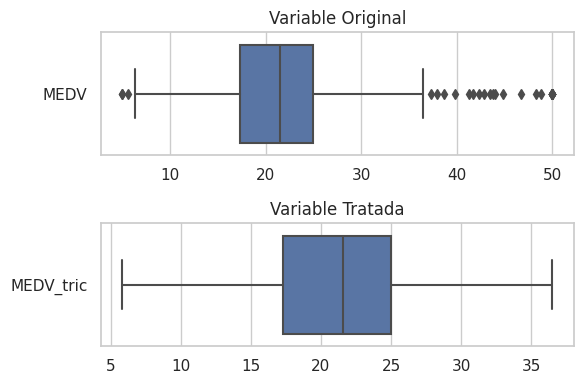

In [34]:
# Crear figura y subplots
fig, axes = plt.subplots(2, 1, figsize=(6, 4))

ax1 = axes[0]
sns.boxplot(data=train[['MEDV']], orient="h", ax=ax1)
ax1.set_title('Variable Original')

ax2 = axes[1]
sns.boxplot(data=train[['MEDV_tric']], orient="h", ax=ax2)
ax2.set_title('Variable Tratada')
# Ajustar espaciado entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()


### 4.2. Tratamiento de Missings

Imputación de valores: En lugar de eliminar los valores faltantes, se pueden reemplazar por valores estimados o imputados. Esto implica reemplazar los valores faltantes con medidas de tendencia central, como la media o la mediana, o utilizar métodos más avanzados como la regresión o el algoritmo K-NN para estimar los valores faltantes basándose en otros atributos del conjunto de datos.

In [36]:
# Variables hasta el momento
actual_features = [x + '_tric' for x in preselection.feature.tolist()]

In [ ]:
actual_features.head()

In [37]:

# Tratamiento en train
train[[x + '_imp' for x in actual_features]] = train[actual_features].fillna(train[actual_features].median())

# Tratamiento en test
test[[x + '_imp' for x in actual_features]] = test[actual_features].fillna(train[actual_features].median())


In [43]:
train[[x + '_imp' for x in actual_features]].head(30)

,MEDV_tric_imp,LSTAT_tric_imp,RM_tric_imp,PTRATIO_tric_imp,INDUS_tric_imp,TAX_tric_imp,NOX_tric_imp,AGE_tric_imp,RAD_tric_imp,CRIM_tric_imp,ZN_tric_imp,B_tric_imp,DIS_tric_imp
273,35.2000,6.580,7.69100,18.6,6.96,223,0.4640,51.8,3.0,0.221880,20.00,390.770,4.3665
52,25.0000,5.280,6.51100,16.8,5.64,243,0.4390,21.1,4.0,0.053600,21.00,396.900,6.8147
181,36.2000,9.450,6.14400,17.8,2.46,193,0.4880,62.2,3.0,0.068880,0.00,396.900,2.5979
452,16.1000,17.270,6.29700,20.2,18.10,666,0.7130,91.8,14.0,5.090170,0.00,385.090,2.3682
381,10.9000,21.080,6.54500,20.2,18.10,666,0.6710,99.1,14.0,5.917033,0.00,396.900,1.5192
192,36.4000,2.870,7.17800,15.2,3.44,398,0.4370,26.3,5.0,0.222120,31.25,390.490,6.4798
482,25.0000,7.010,7.06100,20.2,18.10,666,0.5320,77.0,14.0,5.731160,0.00,395.280,3.4106
104,20.1000,12.330,6.16700,20.9,8.56,384,0.5200,90.0,5.0,0.139600,0.00,392.690,2.4210
500,16.8000,14.330,6.02700,19.2,9.69,391,0.5850,79.7,6.0,0.224380,0.00,396.900,2.4982
481,23.7000,7.740,6.75000,20.2,18.10,666,0.5320,74.9,14.0,5.708180,0.00,393.070,3.3317


### 4.3. Reescalamiento de datos

Es un proceso en el análisis de datos que consiste en transformar las variables para que tengan una escala común o un rango específico. El objetivo principal del reescalamiento de datos es colocar todas las variables en una misma escala numérica, lo cual puede facilitar la comparación y el análisis de las variables.

Z-Score Scaling: También conocido como estandarización, transforma los datos para que tengan una media de 0 y una desviación estándar de 1. La fórmula para la estandarización es:

x_std = (x - mean(x)) / std(x)

In [44]:
# Variables hasta el momento
actual_features = [x + '_imp' for x in actual_features]

In [48]:
# estandarizando las variables para mantener todas en una misma escala
train[[x + '_std' for x in actual_features]] = (train[actual_features] - train[actual_features].mean())/train[actual_features].std()
test[[x + '_std' for x in actual_features]] = (test[actual_features] - train[actual_features].mean())/train[actual_features].std()

train.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,PTRATIO_tric_imp_std,INDUS_tric_imp_std,TAX_tric_imp_std,NOX_tric_imp_std,AGE_tric_imp_std,RAD_tric_imp_std,CRIM_tric_imp_std,ZN_tric_imp_std,B_tric_imp_std,DIS_tric_imp_std
273,0.22188,20.0,6.96,1.0,0.464,7.691,51.8,4.3665,3,223,...,0.071037,-0.565320,-1.073460,-0.755647,-0.588710,-0.886282,-0.579690,1.144769,0.401301,0.251647
52,0.05360,21.0,5.64,0.0,0.439,6.511,21.1,6.8147,4,243,...,-0.781411,-0.763675,-0.953219,-0.975205,-1.702292,-0.653879,-0.654039,1.230287,0.762944,1.424404
181,0.06888,0.0,2.46,0.0,0.488,6.144,62.2,2.5979,3,193,...,-0.307828,-1.241529,-1.253822,-0.544872,-0.211470,-0.886282,-0.647288,-0.565590,0.762944,-0.595563
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24,666,...,0.828769,1.108673,1.589887,1.431145,0.862213,1.670149,1.571230,-0.565590,0.066205,-0.705596
381,15.87440,0.0,18.10,0.0,0.671,6.545,99.1,1.5192,24,666,...,0.828769,1.108673,1.589887,1.062288,1.127006,1.670149,1.936557,-0.565590,0.762944,-1.112291
192,NaN,45.0,3.44,0.0,0.437,7.178,26.3,6.4798,5,398,...,-1.539142,-1.094266,-0.021348,-0.992769,-1.513672,-0.421476,-0.579584,2.106845,0.384782,1.263977
482,5.73116,0.0,18.10,NaN,0.532,7.061,77.0,3.4106,24,666,...,0.828769,1.108673,1.589887,-0.158451,0.325371,1.670149,1.854434,-0.565590,0.667371,-0.206257
104,0.13960,0.0,8.56,0.0,0.520,6.167,90.0,2.4210,5,384,...,1.160276,-0.324890,-0.105517,-0.263839,0.796921,-0.421476,-0.616043,-0.565590,0.514572,-0.680303
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,...,0.355187,-0.155087,-0.063432,0.307011,0.423309,-0.189074,-0.578585,-0.565590,0.762944,-0.643322
481,5.70818,0.0,18.10,0.0,0.532,6.750,74.9,3.3317,24,666,...,0.828769,1.108673,1.589887,-0.158451,0.249198,1.670149,1.844281,-0.565590,0.536991,-0.244052


In [47]:
train.dtypes

CRIM                    float64
ZN                      float64
INDUS                   float64
CHAS                    float64
NOX                     float64
RM                      float64
AGE                     float64
DIS                     float64
RAD                       int64
TAX                       int64
PTRATIO                 float64
B                       float64
LSTAT                   float64
MEDV                    float64
MEDV_tric               float64
LSTAT_tric              float64
RM_tric                 float64
PTRATIO_tric            float64
INDUS_tric              float64
TAX_tric                  int64
NOX_tric                float64
AGE_tric                float64
RAD_tric                float64
CRIM_tric               float64
ZN_tric                 float64
B_tric                  float64
DIS_tric                float64
MEDV_tric_imp           float64
LSTAT_tric_imp          float64
RM_tric_imp             float64
PTRATIO_tric_imp        float64
INDUS_tr

## 5. Modelo de regresión Lineal

### Regresión lineal por MCO

In [ ]:
# Utilizamos el target con tratamiento de outliers, debido a que no es necesario estandarizar ni hacer tratamiento de missings en este (solo aplica para el target)
[x for x in train.columns.tolist() if 'MEDV' in x]


In [ ]:
# Variables finalmente tratadas
actual_features = [x + '_std' for x in actual_features]
actual_features.remove(target + 'tric_imp_std')

Ejecutamos un modelo inicial exploratorio

In [ ]:
import statsmodels.api as sm

# Fit and summarize OLS model
lr = sm.OLS(train[target + '_tric'],
             sm.add_constant(train[actual_features]))
model = lr.fit()


In [ ]:
print(model.summary())

### Técnicas de selección de variables

Son técnicas utilizadas en la selección de variables en modelos de regresión para determinar qué variables son las más relevantes o significativas para predecir la variable dependiente.

> **Backward**: Este método, comienza con un modelo que incluye todas las variables predictoras y luego, de forma iterativa, vas eliminando una variable a la vez, basándote en algún criterio predefinido, como el valor p. En cada iteración, se elimina la variable que tiene el menor impacto en el modelo hasta que se cumple un criterio de parada predefinido, como un nivel de significancia o un umbral de mejora en el ajuste.

> **Forward**: Este método, comienza con un modelo que incluye solo una variable predictora y, de forma iterativa, agregas variables adicionales al modelo, una a la vez. En cada iteración, se selecciona la variable que proporciona la mayor mejora en el ajuste del modelo.

> **Stepwise** (paso a paso): Este método es una combinación de los métodos backward y forward. Comienza con un modelo vacío y luego, en cada paso, decide si agregar o eliminar una variable predictora. En cada paso, se evalúa tanto la adición como la eliminación de variables, basándose en criterios como los valores p.

**Método Backward en python**

In [ ]:
import copy

# Realizar una copia profunda de la lista
features_to_backward = copy.deepcopy(actual_features)

# Fit and summarize OLS model
lr = sm.OLS(train[target + '_tric'],
            sm.add_constant(train[features_to_backward]))
model = lr.fit()

while sum(model.pvalues > 0.05) >= 1:
  toRemove = pd.DataFrame(model.pvalues).idxmax(axis=0)[0]
  print(f'Retirando la variable: {toRemove}')
  features_to_backward.remove(toRemove)

  # Fit and summarize OLS model
  lr = sm.OLS(train[target + '_tric'],
            sm.add_constant(train[features_to_backward]))
  model = lr.fit()


In [ ]:
print(model.summary())

Recuerda que un paso crucial es siempre validar los sentidos económicos de las variables.


* <b>crim : </b> Tasa de criminalidad per cápita por ciudad.

* <b>zn : </b> Proporción de terreno residencial dividido en zonas para lotes de más de 25,000 pies cuadrados.

* <b>indus : </b> Proporción de acres comerciales no minoristas por ciudad.

* <b>chas : </b> Variable ficticia de Charles River (= 1 si el tramo limita con el río; 0 en caso contrario).

* <b>nox : </b>Concentración de óxidos de nitrógeno (partes por 10 millones).

* <b>rm : </b>Número medio de habitaciones por vivienda.

* <b>años : </b> Proporción de unidades ocupadas por sus propietarios construidas antes de 1940.

* <b>dis : </b>Media ponderada de las distancias a cinco centros de empleo de Boston.

* <b>rad : </b>Indice de accesibilidad a carreteras radiales.

* <b>impuesto : </b>Tasa de impuesto a la propiedad de valor total por \$ 10,000.

* <b>ptratio : </b>Proporción alumno-profesor por ciudad.

* <b>black : </b> 1000 (Bk - 0.63) ^ 2 donde Bk es la proporción de negros por ciudad.

* <b>lstat : </b>Estatus más bajo de la población (porcentaje).

* <b>medv : </b>Valor medio de las viviendas ocupadas por sus propietarios en \$ 1000.

---


In [ ]:
final_features = ['LSTAT_tric_imp_std', 'RM_tric_imp_std', 'PTRATIO_tric_imp_std',
                  'NOX_tric_imp_std', 'RAD_tric_imp_std', 'DIS_tric_imp_std']

# Fit and summarize OLS model
lr = sm.OLS(train[target + '_tric'],
            sm.add_constant(train[final_features]))
model = lr.fit()
print(model.summary())

### Independencia entre variables predictoras

En un análisis de regresión, uno de los supuestos clave es el supuesto de independencia entre las variables independientes (predictoras). Este supuesto implica que no debe existir una relación sistemática o estructurada entre las variables independientes, es decir, que las variables deben ser independientes entre sí.

La independencia entre las variables independientes es importante para evitar problemas de multicolinealidad, que ocurren cuando existe una alta correlación entre las variables predictoras. La multicolinealidad puede hacer que los coeficientes estimados sean poco confiables o difíciles de interpretar.

La violación del supuesto de independencia puede afectar negativamente la precisión y confiabilidad del modelo de regresión. Si existe una dependencia entre las variables independientes, esto puede introducir sesgos en las estimaciones de los coeficientes de regresión y dificultar la interpretación de los resultados.

In [ ]:
train[['LSTAT_tric_imp_std', 'RM_tric_imp_std', 'PTRATIO_tric_imp_std',
       'NOX_tric_imp_std', 'DIS_tric_imp_std']].corr()

Nos quedaremos con variables con correlación menor al 60%

In [ ]:
lr = sm.OLS(train[target + '_tric'], sm.add_constant(train[['LSTAT_tric_imp_std',
                                                    'RM_tric_imp_std',
                                                    'PTRATIO_tric_imp_std',
                                                    'DIS_tric_imp_std']]))
model = lr.fit()
print(model.summary())

## 6. Métricas de desempeño

**Puntuación del modelo**

In [ ]:
train['MEDV_pred'] = (22.0443 - 4.0729*train.LSTAT_tric_imp_std
                              + 2.4565*train.RM_tric_imp_std
                              - 1.6619*train.PTRATIO_tric_imp_std
                              - 0.4832*train.DIS_tric_imp_std)


In [ ]:
train[['MEDV_tric', 'MEDV_pred']].head()

También podemos utilizar la sentencia predict del modelo

In [ ]:
final_features = ['LSTAT_tric_imp_std', 'RM_tric_imp_std', 'PTRATIO_tric_imp_std', 'DIS_tric_imp_std']

In [ ]:
train['MEDV_pred'] = model.predict(sm.add_constant(train[final_features]))
test['MEDV_pred'] = model.predict(sm.add_constant(test[final_features]))


Calculamos las principales métricas de desempeño

In [ ]:
from sklearn.metrics import *
from math import sqrt


In [ ]:
# calculamos las principales métricas de desempeño para un modelo de regresión

preformance = pd.DataFrame({'metric' : ['r2', 'mape', 'mse', 'rmse', 'mae'],
                            'train' : [r2_score(train[target + '_tric'], train[target + '_pred']),
                                      mean_absolute_percentage_error(train[target + '_tric'], train[target + '_pred']),
                                      mean_squared_error(train[target + '_tric'], train[target + '_pred']),
                                      sqrt(mean_squared_error(train[target + '_tric'], train[target + '_pred'])),
                                      mean_absolute_error(train[target + '_tric'], train[target + '_pred'])
                                      ],
                            'test' : [r2_score(test[target + '_tric'], test[target + '_pred']),
                                      mean_absolute_percentage_error(test[target + '_tric'], test[target + '_pred']),
                                      mean_squared_error(test[target + '_tric'], test[target + '_pred']),
                                      sqrt(mean_squared_error(test[target + '_tric'], test[target + '_pred'])),
                                      mean_absolute_error(test[target + '_tric'], test[target + '_pred'])
                                      ]})

preformance


In [ ]:

# Crear scatterplot
plt.figure(figsize=(6, 4))
plt.scatter(test[target + '_pred'], test[target + '_tric'], alpha = 0.5)
plt.plot(test[target + '_pred'], test[target + '_pred'], color='red')

# Personalizar el título y los nombres de los ejes
plt.title(f"Predicción vs Real")
plt.xlabel("Valor predicho")
plt.ylabel("Valor real")

# Mostrar el gráfico
plt.show()


## 7. Regresiones No lineales

In [ ]:
plt.scatter(train.AGE_tric, train.MEDV_tric, alpha = 0.5)

In [ ]:
# Calcular el coeficiente de correlación
np.corrcoef(train.AGE_tric.fillna(train.AGE_tric.mean()), train.MEDV_tric)[0, 1]

**Coeficiente de correlación de Spearman**

El coeficiente de correlación de Spearman evalúa la relación monótona entre dos conjuntos de datos, lo que significa que no asume una relación lineal, sino una relación creciente o decreciente.

In [ ]:
from scipy.stats import spearmanr

# Calcular el coeficiente de correlación de Spearman
correlation, p_value = spearmanr(train.AGE_tric.fillna(train.AGE_tric.mean()), train.MEDV_tric)
correlation

Ejemplo de cómo funcionan las interacciones no lineales

In [ ]:
import random
import math

x = [random.randint(1, 100) for _ in range(100)]
y = [-math.exp(sqrt(x)) for x in x]
plt.scatter(x, y)

In [ ]:
plt.scatter(train.AGE_tric.apply(lambda x: -math.exp(sqrt(x))), train.MEDV_tric, alpha = 0.5)

In [ ]:
# Calcular el coeficiente de correlación
np.corrcoef(train.AGE_tric.fillna(train.AGE_tric.mean()).apply(lambda x: -math.exp(sqrt(x))), train.MEDV_tric)[0, 1]

---

# Gracias por completar este laboratorio!

---

